In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, accuracy_score

In [3]:
df = pd.read_csv('Titanic-Dataset.csv')

In [4]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


#  NOMOR 1: EKSPLORASI AWAL

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# A

Jumlah_penumpang = df.shape[0]
print(f"Jumlah penumpang : {Jumlah_penumpang}")

Jumlah penumpang : 891


a) Jumlah penumpang = 891

In [7]:
# B

#melihat jumlah penumpang yang selamat [1]
df['Survived'].sum()

#melihat jumlah penumpang yant idak selamat [0]
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


b)

jumlah penonton selamat (1) = 342

jumlah penonton tidak selamat (0) = 549





In [8]:
# C

print(f"c)")
# Rata-rata umur penumpang
rata_rata_umur = df['Age'].mean()
print(f"   Rata-rata umur penumpang: {rata_rata_umur:.2f} tahun")

# Penumpang termuda
umur_termuda = df['Age'].min()
print(f"   Umur penumpang termuda: {umur_termuda} tahun")

# Penumpang tertua
umur_tertua = df['Age'].max()
print(f"   Umur penumpang tertua: {umur_tertua} tahun")

c)
   Rata-rata umur penumpang: 29.70 tahun
   Umur penumpang termuda: 0.42 tahun
   Umur penumpang tertua: 80.0 tahun


D)
   Jumlah penumpang laki-laki : 577
   Jumlah penumpang perempuan : 314
 
 
 
    Bar Chart


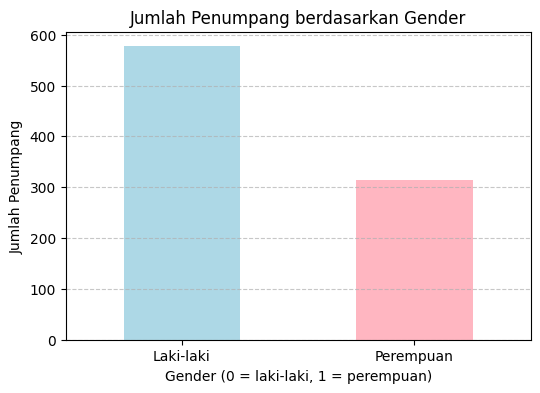

 
 
 
Jadi Penumpang laki-laki lebih banyak.


In [9]:
# D


print(f"D)")

#menghitung jumlah penumpang laki-laki
laki = df['Sex'].value_counts()['male']
print(f"   Jumlah penumpang laki-laki : {laki}")

#menghitung jumlah penumpang perempuan
perempuan = df['Sex'].value_counts()['female']
print(f"   Jumlah penumpang perempuan : {perempuan}")

print(f" ")
print(f" ")
print(f" ")

#Visualisasi
print(f"    Bar Chart")

import matplotlib.pyplot as plt # Importing the matplotlib library

plt.figure(figsize=(6,4))
df['Sex'].value_counts().plot(kind='bar', color=['lightblue', 'lightpink'])
plt.title('Jumlah Penumpang berdasarkan Gender')
plt.xlabel('Gender (0 = laki-laki, 1 = perempuan)')
plt.ylabel('Jumlah Penumpang')
plt.xticks([0,1], ['Laki-laki', 'Perempuan'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


print(f" ")
print(f" ")
print(f" ")

#Mana yang paling besar
if laki > perempuan:
    print("Jadi Penumpang laki-laki lebih banyak.")
else:
    print("Jadi Penumpang perempuan lebih banyak.")


E)
   Jumlah penumpang di kelas 1 : 216
   Jumlah penumpang di kelas 2 : 184
   Jumlah penumpang di kelas 3 : 491
 
 
 
   Presentasi penumpang kelas 1 : 24.24%
   Presentasi penumpang kelas 2 : 20.65%
   Presentasi penumpang kelas 3 : 55.11%
 
 
 


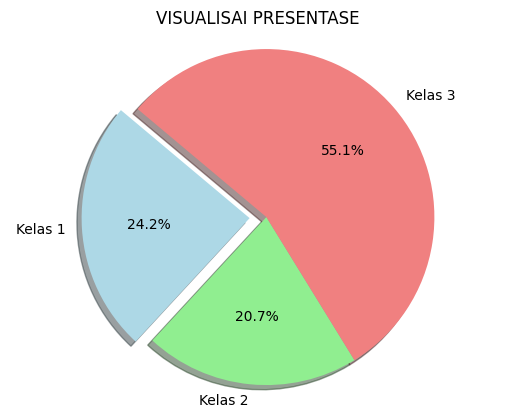

In [10]:
# E


print(f"E)")

#menghitung jumlah penumpang di kelas 1
kelas_satu = df['Pclass'].value_counts()[1]
print(f"   Jumlah penumpang di kelas 1 : {kelas_satu}")

#menghitung jumlah penumpang di kelas 2
kelas_dua = df['Pclass'].value_counts()[2]
print(f"   Jumlah penumpang di kelas 2 : {kelas_dua}")

#menghitung jumlah penumpang di kelas 3
kelas_tiga = df['Pclass'].value_counts()[3]
print(f"   Jumlah penumpang di kelas 3 : {kelas_tiga}")

print(f" ")
print(f" ")
print(f" ")

#MENGHITUNG PRESENTASI

#presentasi kelas 1
presentasi_kelas_satu = (kelas_satu / Jumlah_penumpang) * 100
print(f"   Presentasi penumpang kelas 1 : {presentasi_kelas_satu:.2f}%")

#presentasi kelas 2
presentasi_kelas_dua = (kelas_dua / Jumlah_penumpang) * 100
print(f"   Presentasi penumpang kelas 2 : {presentasi_kelas_dua:.2f}%")

#presentasi kelas 3
presentasi_kelas_tiga = (kelas_tiga / Jumlah_penumpang) * 100
print(f"   Presentasi penumpang kelas 3 : {presentasi_kelas_tiga:.2f}%")

print(f" ")
print(f" ")
print(f" ")

#Pie Chart

labels = ['Kelas 1', 'Kelas 2', 'Kelas 3']
sizes = [presentasi_kelas_satu, presentasi_kelas_dua, presentasi_kelas_tiga]
colors = ['lightblue', 'lightgreen', 'lightcoral']
explode = (0.1, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('VISUALISAI PRESENTASE')
plt.show()

# NOMOR 2 : Pre-processing

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


a) Dari output diatas diketahui ada kolom yang missing value yaitu pada kolom Age, yang dimana harusnya terdapat 891 tapi dikolom Age hanya ada 714.

In [12]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [13]:
df['Age']=df['Age'].fillna(df['Age'].median())

B) Karena terdapat missing value pada kolom Age maka kita mengganti data yang kosong dengan value yang baru yang didapat dengan metode median.

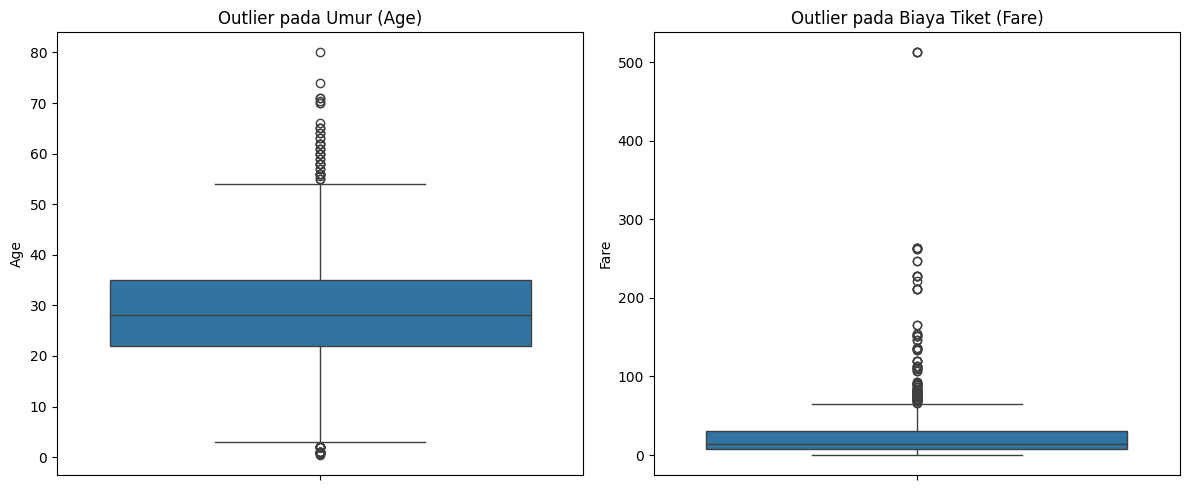

In [16]:
#Visualisai Outlier

!pip install seaborn
import seaborn as sns # Import the seaborn library and assign it to the alias 'sns'
import matplotlib.pyplot as plt
import pandas as pd


plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(data=df, y='Age') # Now you can use 'sns' to refer to seaborn functions
plt.title('Outlier pada Umur (Age)')

plt.subplot(1,2,2)
sns.boxplot(data=df, y='Fare')
plt.title('Outlier pada Biaya Tiket (Fare)')

plt.tight_layout()
plt.show()

In [18]:
#Melihat jumlah outlier

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # Kuartil 1
    Q3 = data[column].quantile(0.75)  # Kuartil 3
    IQR = Q3 - Q1  # Rentang interkuartil
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Define num_cols to include numerical columns from the DataFrame
num_cols = ['Age', 'Fare']  # Assuming these are your numerical columns

# Cek jumlah outlier untuk setiap kolom numerik
for col in num_cols:
    outliers = detect_outliers_iqr(df, col) # Pass 'df' as the data argument
    print(f"{col}: {len(outliers)} outliers")

Age: 66 outliers
Fare: 116 outliers


C) Outlier adalah data yang sangat berbeda (jauh) dari sebagian besar data lainnya.

Pada data ini terdapat 2 kolom yang memiliki outlier, yaitu:


1.   Age  : 66 outlier
2.   Fare : 116 outlier



In [19]:
# Metode Winsoirizing untuk mengatasi outlier

from scipy.stats.mstats import winsorize

# Winsorize kolom 'Age'
df['Age_winsorized'] = winsorize(df['Age'], limits=[0.05, 0.05])

# Winsorize kolom 'Fare'
df['Fare_winsorized'] = winsorize(df['Fare'], limits=[0.05, 0.05])

D) Ya outlier perlu diattasi karena adanya outlier dapat mempengaruhi hasil model. Outlier dapat diatasi dengan membatasi nilai outlier dengan menggantinya dengan nilai persentil tertentu (metode winsorizing).

In [21]:
# E

import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler


# Tangani missing value dulu
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)

# PILIH KOLOM NUMERIK YANG MAU DISTANDARISASI
fitur = df[['Age', 'Fare']]

# 1. StandardScaler
scaler_standard = StandardScaler()
fitur_standard = scaler_standard.fit_transform(fitur)

# 2. MinMaxScaler
scaler_minmax = MinMaxScaler()
fitur_minmax = scaler_minmax.fit_transform(fitur)

# 3. RobustScaler
scaler_robust = RobustScaler()
fitur_robust = scaler_robust.fit_transform(fitur)

# Masukkan kembali ke DataFrame untuk lihat hasil
df_standard = pd.DataFrame(fitur_standard, columns=['Age_scaled', 'Fare_scaled'])
df_minmax = pd.DataFrame(fitur_minmax, columns=['Age_scaled', 'Fare_scaled'])
df_robust = pd.DataFrame(fitur_robust, columns=['Age_scaled', 'Fare_scaled'])

print("Contoh hasil StandardScaler:")
print(df_standard.head())

print("\nContoh hasil MinMaxScaler:")
print(df_minmax.head())

Contoh hasil StandardScaler:
   Age_scaled  Fare_scaled
0   -0.565736    -0.502445
1    0.663861     0.786845
2   -0.258337    -0.488854
3    0.433312     0.420730
4    0.433312    -0.486337

Contoh hasil MinMaxScaler:
   Age_scaled  Fare_scaled
0    0.271174     0.014151
1    0.472229     0.139136
2    0.321438     0.015469
3    0.434531     0.103644
4    0.434531     0.015713


<ipython-input-21-7327c16f1f47>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-21-7327c16f1f47>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

# NOMOR 3: Modeling

A) Pembagian data menjadi data training dan data testing adalah langkah penting dalam proses machine learning atau data mining untuk membangun dan mengevaluasi model prediksi.

Proses pembagian data

**Data Training**

*   Digunakan untuk melatih model.
*   Model akan belajar pola dari data ini.
*  Biasanya mencakup 70–80% dari seluruh dataset.


**Data Testing**

* Digunakan untuk menguji performa model.
* Model tidak pernah melihat data ini saat pelatihan.
* Biasanya sekitar 20–30% dari total data.







In [22]:
# B

from sklearn.model_selection import train_test_split

# Proses pembagian
X = df[['Pclass', 'Sex', 'Age', 'Fare']]  # fitur
X['Sex'] = X['Sex'].map({'male': 1, 'female': 0})  # encoding
X['Age'].fillna(X['Age'].median(), inplace=True)
X['Fare'].fillna(X['Fare'].median(), inplace=True)
y = df['Survived']  # label

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<ipython-input-22-484b6620476e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = X['Sex'].map({'male': 1, 'female': 0})  # encoding
<ipython-input-22-484b6620476e>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['Age'].fillna(X['Age'].median(), inplace=True)
<ipython-input-

B) Untuk dataset Titanic (sekitar 891 baris), pembagian 80% : 20% atau 70% : 30% itu aman dan representatif. Namun, kali ini saya menggunakan pembagian dengan presentasi 80% : 20%

In [26]:
# C

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Inisialisasi model
model_knn = KNeighborsClassifier(n_neighbors=5)
model_tree = DecisionTreeClassifier(random_state=42)
model_logreg = LogisticRegression(max_iter=1000)

# Latih model
model_knn.fit(X_train, y_train)
model_tree.fit(X_train, y_train)
model_logreg.fit(X_train, y_train)

# Prediksi
y_pred_knn = model_knn.predict(X_test)
y_pred_tree = model_tree.predict(X_test)
y_pred_logreg = model_logreg.predict(X_test)



C) Model klasifikasi yang akan digunakan yaitu:



*   **K-Nearest Neighbors (KNN)**
Model KNN adalah algoritma klasifikasi atau regresi yang menentukan hasil berdasarkan kemiripan (jarak) dengan data lain di sekitarnya.

  cara kerja : Misal K=3, model lihat 3 tetangga terdekat → mayoritas kelas jadi hasil prediksi

*   **Decision Tree**
Decision Tree (pohon keputusan) adalah model yang memetakan keputusan dan hasilnya dalam bentuk struktur pohon.

  cara kerja : Tiap cabang berdasarkan fitur → akhir cabang adalah prediksi (survived atau tidak)
*  **Logistic Regression**
Meskipun namanya “regression”, logistic regression adalah model klasifikasi, biasanya untuk dua kelas (binary classification).

  cara kerja : Mencoba memetakan fitur jadi probabilitas antara 0 dan 1




In [30]:
# Evaluasi
from sklearn.metrics import accuracy_score

print("=== KNN ===")
print(classification_report(y_test, y_pred_knn))

print("=== Decision Tree ===")
print(classification_report(y_test, y_pred_tree))

print("=== Logistic Regression ===")
print(classification_report(y_test, y_pred_logreg))

# akurasi knn
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Akurasi KNN: {accuracy_knn * 100:.2f}%")
# akurasi Decision Tree
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Akurasi Decision Tree: {accuracy_tree * 100:.2f}%")
# akurasi Logistic Regression
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Akurasi Logistic Regression: {accuracy_logreg * 100:.2f}%")



=== KNN ===
              precision    recall  f1-score   support

           0       0.69      0.83      0.75       105
           1       0.65      0.46      0.54        74

    accuracy                           0.68       179
   macro avg       0.67      0.64      0.64       179
weighted avg       0.67      0.68      0.66       179

=== Decision Tree ===
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       105
           1       0.69      0.72      0.70        74

    accuracy                           0.75       179
   macro avg       0.74      0.74      0.74       179
weighted avg       0.75      0.75      0.75       179

=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg

D)

* **Accuracy** : Persentase prediksi yang benar

* **Precision** :	Dari semua prediksi selamat, berapa yang benar

* **Recall** :	Dari semua penumpang yang benar-benar selamat, berapa yang terdeteksi

* **F1-Score**	Rata-rata harmonis precision & recall → seimbang

E) Dari ketiga algoritma tersebut yang terbagus adalah algoritma **Logistic Regression** dengan akurasi sebesar 80,45%.

# NOMOR 4 : Evaluasi

In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_logreg))


              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



A) Fokus pada kolom "1"
* Precision (kelas 1) = 0.82
→ Dari semua yang diprediksi selamat, 82% benar-benar selamat.

* Recall (kelas 1) = 0.75
→ Dari semua penumpang yang benar-benar selamat, model menangkap 75%.

In [34]:
print(f"B)")

import numpy as np

# Jumlah penumpang yang diprediksi selamat (y_pred = 1)
jumlah_prediksi_selamat = np.sum(y_pred_logreg == 1)

# Jumlah yang diprediksi selamat dan memang benar-benar selamat
benar_selamat = np.sum((y_pred_logreg == 1) & (y_test.values == 1))

print(f"Jumlah penumpang yang DIPREDIKSI selamat: {jumlah_prediksi_selamat}")
print(f"Jumlah penumpang yang BENAR-BENAR selamat dari prediksi itu: {benar_selamat}")

B)
Jumlah penumpang yang DIPREDIKSI selamat: 69
Jumlah penumpang yang BENAR-BENAR selamat dari prediksi itu: 54
